In [ ]:
# http://www.emergentmind.com/neural-network
# https://hmkcode.com/ai/backpropagation-step-by-step/
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [ ]:
# Revisa la documentacion de python para poder instalar tensorflow.
# Quizas alguno de las siguientes lineas sean de utilidad, o usa la suite anaconda.
# !conda install tensorflow
# !pip install tensorflow

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:000:00:01 eta 0:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 3.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.0 MB/s eta 0:00:003.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 5.5 MB/s 

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Nosinteresa resolver el problema de predicción siguiente
$$
\mathbf{x}_{sepal} = \begin{pmatrix}
           length \\
           width
         \end{pmatrix}\mapsto 
  \mathbf{y}_{petal}= \begin{pmatrix}
           length \\
           width
         \end{pmatrix} 
$$
Es decir, se trata de un problema de regresión múltiple.

*We also keep the labels in a vector L, only for visualzation purposes.*

In [49]:
#load the data
iris = load_iris()
X = iris.data[:, :2]
Y = iris.data[:, 2:]
L = iris.target

print("X data:", X.shape)
print("Y data:", Y.shape)
print("L data:", L.shape)

X data: (150, 2)
Y data: (150, 2)
L data: (150,)


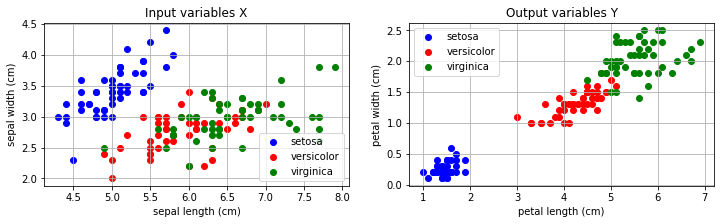

In [50]:
# Plot input and output variables
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.title('Input variables X')
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label=iris.target_names[0])
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label=iris.target_names[1])
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.subplot(1, 2, 2)
plt.title('Output variables Y')
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label=iris.target_names[0])
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label=iris.target_names[1])
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.show()

In [51]:
# Split it into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, l_train, l_test = train_test_split(X, Y, L, test_size=0.1)

print("Training + validation inputs X:", x_train.shape)
print("Test inputs X:", x_test.shape)
print("Training + validation outputs Y:", y_train.shape)
print("Test outputs Y:", y_test.shape)
print("Training + validation labels l:", l_train.shape)
print("Test labels l:", l_test.shape)

Training + validation inputs X: (135, 2)
Test inputs X: (15, 2)
Training + validation outputs Y: (135, 2)
Test outputs Y: (15, 2)
Training + validation labels l: (135,)
Test labels l: (15,)


In [16]:
# Documentación de tensorflow y keras
# https://www.tensorflow.org/
# https://keras.io/

In [52]:
# import tensorflow an the classes Model, Input (place-holder layer), and Dense (fully connected layer)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [53]:
# Create an MLP of two inputs x=[x1, x2], and two outputs y=[y1, y2]
i = Input(shape=(2,), name='input')
o = Dense(units=2, activation=None, name='output')(i)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 output (Dense)              (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


# Q1: Revisa la documentación de `tensorflow`: ¿qué tipo de activación tiene la capa de salida de la red que acabamos de crear?

Como se especificó `None` para la función de activación, signifca que se usa una función de activación lineal, es decir que los *inputs* son transformados vía
$$
s(\mathbf{x}_{sepal})=\mathbf{w}_0^T\mathbf{x}_{sepal}
$$
con $\mathbf{w}_0\in\mathbb{R}^n$ fijo.

# Q2: Según la documentación de tensorflow (y/o el código de la siguiente celda), qué estructura de datos usa tensorflow para organizar las capas de una red?

Una matriz, cuyas filas son el vector de pesos asociado a cada capa de la red neuronal.

In [54]:
MLP.layers[1].get_weights()

[array([[ 0.23091137,  0.649207  ],
        [ 0.7777294 , -0.07633984]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [55]:
# Obtain weights and biases of the hidden layer
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 0.23091137  0.649207  ]
 [ 0.7777294  -0.07633984]]
Initial biases (2,)
[0. 0.]


In [56]:
# Plot a diagram of the MLP model
from tensorflow.keras.utils import plot_model
plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [57]:
# Here we define the optimizer and loss function
# sgd and mse in this initial example
MLP.compile(optimizer='sgd', loss='mse')

In [58]:
# And now we train the model
# Learn to predict petal's lenght and width from sepal's lenght and width
train_history = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=20, validation_split=0.2)

Epoch 1/20
27/27 [==============================] - 0s 4ms/step - loss: 1.8973 - val_loss: 1.2926
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 1.5577 - val_loss: 1.0366
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 1.2360 - val_loss: 0.8841
Epoch 4/20
27/27 [==============================] - 0s 2ms/step - loss: 1.1776 - val_loss: 0.8512
Epoch 5/20
27/27 [==============================] - 0s 2ms/step - loss: 1.0036 - val_loss: 0.6495
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 0.8690 - val_loss: 0.6322
Epoch 7/20
27/27 [==============================] - 0s 2ms/step - loss: 0.7142 - val_loss: 0.5229
Epoch 8/20
27/27 [==============================] - 0s 2ms/step - loss: 0.6907 - val_loss: 0.4385
Epoch 9/20
27/27 [==============================] - 0s 2ms/step - loss: 0.5942 - val_loss: 0.3937
Epoch 10/20
27/27 [==============================] - 0s 2ms/step - loss: 0.5298 - val_loss: 0.3653
Epoch 11/20
27/27 [

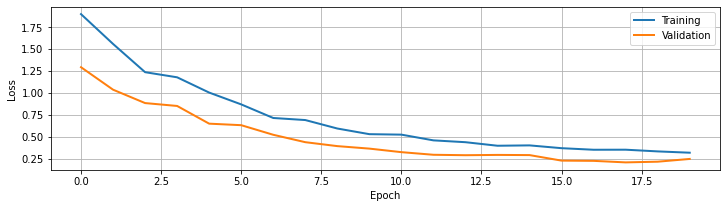

In [59]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 3))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [60]:
# Obtain weights and biases of the hidden layer after training
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 1.3736017   0.5445846 ]
 [-1.377996   -0.65357417]]
Initial biases (2,)
[-0.34219855 -0.15207013]


In [61]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

1.108816146850586

In [62]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

1/1 [==============================] - 0s 57ms/step
(15, 2)


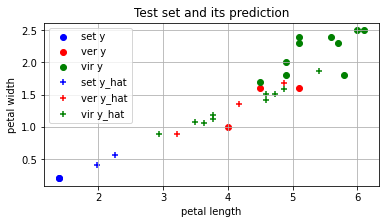

In [63]:
 # Plot y_test_hat
plt.figure(figsize=(6, 3))
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_hat')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_hat')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_hat')

plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Test set and its prediction')
plt.show()

# Q3: En el ejercicio anterior le indicamos a *tensorflow* que separara 20% de los datos de entrenamiento para hacer validación. Dicho 20% es seleccionado de manera aleatoria. Revisa la documentación de la función `.fit()` para saber cómo puedes darle un subset de validación que no cambie entre diferentes corridas de entrenamiento. Reporta tu respuesta.

Si se especifica `validation_data` (np.arrays o tensores) en los argumentos de `Model.fit`, entonces dichso datos se usarán en cada época para evaluar pérdida o cualquier otra métrica al final de cada época.

In [64]:
train_history = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
34/34 [==============================] - 0s 2ms/step - loss: 0.2845 - val_loss: 0.7860
Epoch 2/20
34/34 [==============================] - 0s 2ms/step - loss: 0.2993 - val_loss: 0.8990
Epoch 3/20
34/34 [==============================] - 0s 1ms/step - loss: 0.2862 - val_loss: 0.8361
Epoch 4/20
34/34 [==============================] - 0s 2ms/step - loss: 0.2670 - val_loss: 0.6381
Epoch 5/20
34/34 [==============================] - 0s 2ms/step - loss: 0.2718 - val_loss: 0.8836
Epoch 6/20
34/34 [==============================] - 0s 1ms/step - loss: 0.2838 - val_loss: 0.9445
Epoch 7/20
34/34 [==============================] - 0s 1ms/step - loss: 0.2753 - val_loss: 0.8457
Epoch 8/20
34/34 [==============================] - 0s 2ms/step - loss: 0.2818 - val_loss: 0.9669
Epoch 9/20
34/34 [==============================] - 0s 2ms/step - loss: 0.2798 - val_loss: 0.8133
Epoch 10/20
34/34 [==============================] - 0s 1ms/step - loss: 0.2621 - val_loss: 0.7616
Epoch 11/20
34/34 [

In [65]:
# Obtain weights and biases of the hidden layer after training
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 1.598028   0.6030291]
 [-1.6493404 -0.6953226]]
Initial biases (2,)
[-0.48368445 -0.22437072]


In [66]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.8012653589248657

# Creando un MLP más grande

In [67]:
i = Input(shape=(2,), name='input')
h = Dense(units=32, activation='relu', name='hidden1')(i)
h = Dense(units=64, activation='relu', name='hidden2')(h)
h = Dense(units=32, activation='relu', name='hidden3')(h)
o = Dense(units=2, activation='linear', name='output')(h)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 hidden1 (Dense)             (None, 32)                96        
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 2)                 66        
                                                                 
Total params: 4,354
Trainable params: 4,354
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile it
MLP.compile(optimizer='sgd', loss='mse')

In [72]:
# Train it
train_history = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
27/27 - 0s - loss: 0.3253 - val_loss: 0.1270 - 71ms/epoch - 3ms/step
Epoch 2/20
27/27 - 0s - loss: 0.2750 - val_loss: 0.7366 - 46ms/epoch - 2ms/step
Epoch 3/20
27/27 - 0s - loss: 0.4419 - val_loss: 0.1319 - 45ms/epoch - 2ms/step
Epoch 4/20
27/27 - 0s - loss: 0.2649 - val_loss: 0.5560 - 46ms/epoch - 2ms/step
Epoch 5/20
27/27 - 0s - loss: 0.3207 - val_loss: 0.1817 - 43ms/epoch - 2ms/step
Epoch 6/20
27/27 - 0s - loss: 0.2831 - val_loss: 0.1284 - 48ms/epoch - 2ms/step
Epoch 7/20
27/27 - 0s - loss: 0.2741 - val_loss: 0.1437 - 48ms/epoch - 2ms/step
Epoch 8/20
27/27 - 0s - loss: 0.2437 - val_loss: 0.1303 - 49ms/epoch - 2ms/step
Epoch 9/20
27/27 - 0s - loss: 0.3890 - val_loss: 0.1244 - 46ms/epoch - 2ms/step
Epoch 10/20
27/27 - 0s - loss: 0.2446 - val_loss: 0.1990 - 46ms/epoch - 2ms/step
Epoch 11/20
27/27 - 0s - loss: 0.3140 - val_loss: 0.1298 - 51ms/epoch - 2ms/step
Epoch 12/20
27/27 - 0s - loss: 0.3791 - val_loss: 0.1255 - 50ms/epoch - 2ms/step
Epoch 13/20
27/27 - 0s - loss: 0.2336

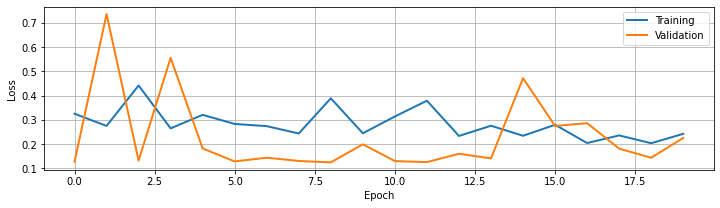

In [73]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 3))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Q4: Nota que esta segunda red, aunque más grande, parece generar peores resultados en comparación con la primera red. Encuentra la mejor combinación de hiperparámetros para minimizar el error tanto como sea posible. 

## Reporta: número de capas, número de perceptrones en cada capa, número total de pesos, tamaño del lote, y número de épocas.

In [256]:
i = Input(shape=(2,), name='input')
h = Dense(units=64, activation='relu', name='hidden4')(i)
o = Dense(units=2, activation='relu', name='output')(h)
MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 hidden4 (Dense)             (None, 64)                192       
                                                                 
 output (Dense)              (None, 2)                 130       
                                                                 
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


In [257]:
# Compile it
MLP.compile(optimizer='sgd', loss='mse')

In [258]:
# Train it
train_history = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=60, verbose=2, validation_split=0.2)

Epoch 1/60
27/27 - 0s - loss: 1.8464 - val_loss: 0.7777 - 435ms/epoch - 16ms/step
Epoch 2/60
27/27 - 0s - loss: 0.9744 - val_loss: 0.5809 - 79ms/epoch - 3ms/step
Epoch 3/60
27/27 - 0s - loss: 0.6995 - val_loss: 0.6349 - 67ms/epoch - 2ms/step
Epoch 4/60
27/27 - 0s - loss: 0.5794 - val_loss: 0.3833 - 66ms/epoch - 2ms/step
Epoch 5/60
27/27 - 0s - loss: 0.5286 - val_loss: 0.3840 - 68ms/epoch - 3ms/step
Epoch 6/60
27/27 - 0s - loss: 0.5118 - val_loss: 0.2118 - 71ms/epoch - 3ms/step
Epoch 7/60
27/27 - 0s - loss: 0.5370 - val_loss: 0.2624 - 85ms/epoch - 3ms/step
Epoch 8/60
27/27 - 0s - loss: 0.3555 - val_loss: 0.4921 - 72ms/epoch - 3ms/step
Epoch 9/60
27/27 - 0s - loss: 0.3640 - val_loss: 0.1646 - 67ms/epoch - 2ms/step
Epoch 10/60
27/27 - 0s - loss: 0.3911 - val_loss: 0.1682 - 75ms/epoch - 3ms/step
Epoch 11/60
27/27 - 0s - loss: 0.3645 - val_loss: 0.1625 - 82ms/epoch - 3ms/step
Epoch 12/60
27/27 - 0s - loss: 0.3202 - val_loss: 0.1577 - 68ms/epoch - 3ms/step
Epoch 13/60
27/27 - 0s - loss: 0.30

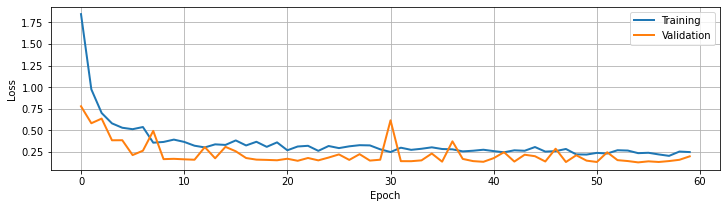

In [259]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 3))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [260]:
# Obtain weights and biases of the hidden layer
for layer in MLP.layers[1:]:
  w, b = layer.get_weights()
  print("Weights: ", w.shape, end='\t') #print(w)
  print("Biases:  ", b.shape) #print(b)

Weights:  (2, 64)	Biases:   (64,)
Weights:  (64, 2)	Biases:   (2,)


In [262]:
# Use the trained model to compute the average train and test loss
print(MLP.evaluate(x=x_train, y=y_train, verbose=False))
print(MLP.evaluate(x=x_test, y=y_test, verbose=False))

0.2492336630821228
0.898483157157898


In [213]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

1/1 [==============================] - 0s 80ms/step
(15, 2)


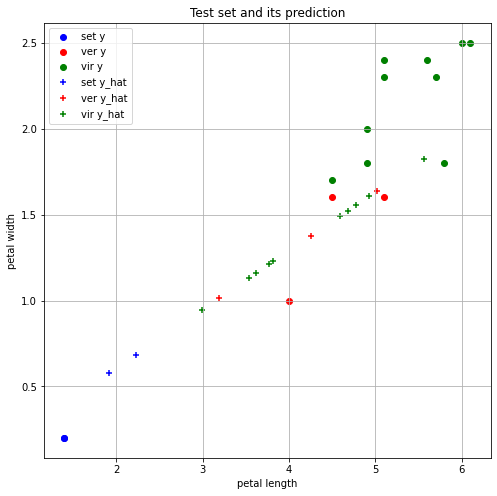

In [235]:
 # Plot y_test_hat
plt.figure(figsize=(8, 8))
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_hat')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_hat')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_hat')

plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Test set and its prediction')
plt.show()

In [ ]:
# Auxiliar function to create an MLP
def create_MLP(n_units=[2, 1], hid_activations=None, last_activation=None):
  h = i = Input(shape=(n_units[0]))
  for units in n_units[1:-1]:
    h = Dense(units=units, activation=hid_activations)(h)
  o = Dense(units=n_units[-1], activation=last_activation)(h)
  return Model(inputs=i, outputs=o)

In [275]:
# Example using the function create_MLP()
MLP = create_MLP([2, 32, 16, 8, 2], hid_activations='sigmoid', last_activation='relu')
MLP.summary()

plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

Model: "model_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_48 (Dense)            (None, 32)                96        
                                                                 
 dense_49 (Dense)            (None, 16)                528       
                                                                 
 dense_50 (Dense)            (None, 8)                 136       
                                                                 
 dense_51 (Dense)            (None, 2)                 18        
                                                                 
Total params: 778
Trainable params: 778
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install gra

In [276]:
# Corre el experimento 100 veces y registra el desempeño promedio y el tiempo de ejecución
loss = np.zeros((100, 2))
for ind in range(100):
  MLP = create_MLP([2, 32, 16, 8, 2], hid_activations='sigmoid', last_activation='relu')
  MLP.compile(optimizer='sgd', loss='mse')
  MLP.fit(x=x_train, y=y_train, batch_size=8, epochs=100, verbose=0, validation_split=0.2)
  loss[ind, 0] = MLP.evaluate(x=x_train, y=y_train, verbose=False)
  loss[ind, 1] = MLP.evaluate(x=x_test, y=y_test, verbose=False)
  print(f"Run {ind+1:3d} -- ", end='')
  print(f"Train loss: {loss[ind, 0]:6.4f}", end='; ')
  print(f"Test loss: {loss[ind, 1]:6.4f}")

print("Average -- ", end='')
print(f" train loss: {loss[:, 0].mean():6.4f} +- {loss[:, 0].std():6.4f}", end='; ')
print(f" test loss: {loss[:, 1].mean():6.4f} +- {loss[:, 1].std():6.4f}")

Run   1 -- Train loss: 2.4229; Test loss: 3.2604
Run   2 -- Train loss: 2.4211; Test loss: 3.2014
Run   3 -- Train loss: 9.1619; Test loss: 13.7113
Run   4 -- Train loss: 8.5093; Test loss: 12.3609
Run   5 -- Train loss: 8.5147; Test loss: 12.3546
Run   6 -- Train loss: 9.1619; Test loss: 13.7113
Run   7 -- Train loss: 8.5123; Test loss: 12.3442
Run   8 -- Train loss: 8.5076; Test loss: 12.3401
Run   9 -- Train loss: 8.5119; Test loss: 12.3488
Run  10 -- Train loss: 8.5134; Test loss: 12.3431
Run  11 -- Train loss: 9.1619; Test loss: 13.7113
Run  12 -- Train loss: 2.4402; Test loss: 3.2227
Run  13 -- Train loss: 8.5104; Test loss: 12.3312
Run  14 -- Train loss: 8.5171; Test loss: 12.3537
Run  15 -- Train loss: 2.4438; Test loss: 3.2202
Run  16 -- Train loss: 8.5125; Test loss: 12.3391
Run  17 -- Train loss: 9.1619; Test loss: 13.7113
Run  18 -- Train loss: 9.1619; Test loss: 13.7113
Run  19 -- Train loss: 1.7344; Test loss: 1.7817
Run  20 -- Train loss: 2.4468; Test loss: 3.2425
Run  2

# Q5 De acuerdo con los resultados obtenidos después de correr el modelo 100 veces, ¿pareciera que el modelo es confiables/estable? ¿por qué si o por qué no?

El modelo parece no ser estable pues tiene un comportamiento *nervioso* . Podemos ver que en cada corrida hay mucha variabilidad del error en el conjunto de entramiento tanto como en el de validación.

Al final ésto lo podemos comprobar, de modo que el error promedio  en entrenamiento es $\overline{E}_{train}=5.71$ y varianza $\sigma^2_{train-err}=3.36^2$ y en validación error promedio 
$\overline{E}_{test}=8.19$ y varianza $\sigma^2_{train-err}=5.23^2$


# Challenge. Now try the other way around.

In [10]:
# Use x1=length and x2=width of the petals as input vector x,
# and predict y1=length and y2=width of the sepals (output vector y).
# Find a good model for this prediction problem.